In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import pandas as pd
#import scipy.linalg # slower
#import scipy.linalg.blas as blas
#import scipy.linalg.cython_blas as blas


In [2]:
import seaborn as sns
sns.set(context='notebook', style='darkgrid', palette='bright', font='sans-serif', font_scale=1.5, color_codes=True)

# Inverse vs linear solver

In [3]:
# This function seems slower than scipy or numpy solve functions
def inverse_then_multiply(A, B):
    """
    Find the solution AX = B where A and B are square matrices
    by computing A^{-1}B
    """
    Ainv = scipy.linalg.inv(A)
    return Ainv@B

def timer(function, n):
    A = np.random.rand(n,n)
    B = np.random.rand(n,n)
    ts = time.time()
    function(A, B)
    return time.time()-ts

In [4]:
from IPython.lib import backgroundjobs as bg
jobs = bg.BackgroundJobManager()

#FILENAME_BENCHMARK_INVERSE='benchmarks/benchmark_inverse.csv'
FILENAME_BENCHMARK_INVERSE='benchmarks/benchmark_inverse_kka.csv'

def recompute_all():
    if not(os.path.exists(FILENAME_BENCHMARK_INVERSE)):
        with open(FILENAME_BENCHMARK_INVERSE, 'a') as f:
            f.write('n,    linear-solver(np)\n')

    with open(FILENAME_BENCHMARK_INVERSE, 'a') as f:
        for n in range(1000, 16000, 1000):
            number_of_replicas = 10 if n <= 5000 else 5
            for repetition in range(number_of_replicas):
                line = [str(n)]
                for function in [np.linalg.solve]: # , scipy.linalg.solve]: # numpy is faster
                    line.append('{:6.4f}  '.format(timer(function, n)))
                line = ', '.join(line)
                f.write('{}\n'.format(line))
                print('\r{}/{} {}'.format(1+repetition, number_of_replicas, line), end='')
                f.flush()

RECOMPUTE=False
if RECOMPUTE:
    jobs.new(recompute_all)


In [18]:
FILENAME_BENCHMARK_INVERSE='benchmarks/benchmark_inverse.csv'

In [19]:
df = pd.read_csv(FILENAME_BENCHMARK_INVERSE).groupby('n')
mean = df.mean()
std  = df.std()
count = df.count()
mean#pd.read_csv(FILENAME_BENCHMARK_INVERSE).groupby('n').std()

linear-solver(np)
n                           
1000                0.034353
2000                0.241030
3000                0.845673
4000                1.832003
5000                3.624690
6000                5.538207
7000                8.726353
8000               12.507333
9000               17.522993
10000              23.713793
11000              31.369720
12000              41.914087
13000              53.965627
14000              65.464827
15000              80.842067

In [20]:
N = mean.index.to_numpy()
inv = mean.to_numpy()[:,0]
err = 2*std.to_numpy()[:,0] / np.sqrt(count.to_numpy()[:,0]-1)
N, inv, err

(array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000, 11000, 12000, 13000, 14000, 15000]),
 array([3.43533333e-02, 2.41030000e-01, 8.45673333e-01, 1.83200333e+00,
        3.62469000e+00, 5.53820667e+00, 8.72635333e+00, 1.25073333e+01,
        1.75229933e+01, 2.37137933e+01, 3.13697200e+01, 4.19140867e+01,
        5.39656267e+01, 6.54648267e+01, 8.08420667e+01]),
 array([1.78266813e-03, 8.43536043e-03, 3.25559406e-02, 4.96769727e-02,
        2.86204214e-01, 2.82503179e-01, 4.64785817e-01, 5.38746966e-01,
        5.97012178e-01, 5.88029029e-01, 8.71116269e-01, 1.52579226e+00,
        2.48997768e+00, 2.44808279e+00, 1.79752533e+00]))

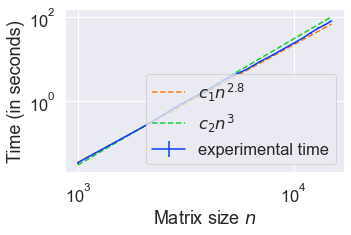

In [21]:
fig = plt.figure(figsize=(5,3))
item = 1
plt.xlabel('Matrix size $n$')
plt.ylabel('Time (in seconds)')
plt.errorbar(N, inv, err, label='experimental time')
plt.plot(N, inv[item]*(N/N[item])**2.8, '--', label=r'$c_1 n^{2.8}$')
plt.plot(N, inv[item]*(N/N[item])**3, '--', label=r'$c_2 n^{3}$')
plt.loglog()
plt.legend()
plt.savefig('../figures/execution_time_solve.pdf', bbox_inches='tight')

In [22]:
for i in range(len(N)):
    print('{:4d} & ${:5.2f}\pm{:5.3f}$ \\\\'.format(int(N[i]), inv[i], err[i]))

1000 & $ 0.03\pm0.002$ \\
2000 & $ 0.24\pm0.008$ \\
3000 & $ 0.85\pm0.033$ \\
4000 & $ 1.83\pm0.050$ \\
5000 & $ 3.62\pm0.286$ \\
6000 & $ 5.54\pm0.283$ \\
7000 & $ 8.73\pm0.465$ \\
8000 & $12.51\pm0.539$ \\
9000 & $17.52\pm0.597$ \\
10000 & $23.71\pm0.588$ \\
11000 & $31.37\pm0.871$ \\
12000 & $41.91\pm1.526$ \\
13000 & $53.97\pm2.490$ \\
14000 & $65.46\pm2.448$ \\
15000 & $80.84\pm1.798$ \\


# Is the complexity of solving more in $O(2^{2.8})$ or $O(n^3)$ ? 

In [23]:

for exponent in [2.8, 2.9, 3]:
    normalization = inv[0]*(N/N[0])**exponent
    plt.errorbar(N, inv/normalization, err/normalization,
             label='$time / n^{'+str(exponent)+'}$ (renormalized)')
plt.legend()

## Nicolas' data

In [11]:
df = pd.read_csv(FILENAME_BENCHMARK_INVERSE).groupby('n')
mean = df.mean()
std  = df.std()
count = df.count()
mean#pd.read_csv(FILENAME_BENCHMARK_INVERSE).groupby('n').std()

linear-solver(np)
n                           
1000                0.034353
2000                0.241030
3000                0.845673
4000                1.832003
5000                3.624690
6000                5.538207
7000                8.726353
8000               12.507333
9000               17.522993
10000              23.713793
11000              31.369720
12000              41.914087
13000              53.965627
14000              65.464827
15000              80.842067

In [12]:
N = mean.index.to_numpy()
inv = mean.to_numpy()[:,0]
err = 2*std.to_numpy()[:,0] / np.sqrt(count.to_numpy()[:,0]-1)
N, inv, err

(array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000, 11000, 12000, 13000, 14000, 15000]),
 array([3.43533333e-02, 2.41030000e-01, 8.45673333e-01, 1.83200333e+00,
        3.62469000e+00, 5.53820667e+00, 8.72635333e+00, 1.25073333e+01,
        1.75229933e+01, 2.37137933e+01, 3.13697200e+01, 4.19140867e+01,
        5.39656267e+01, 6.54648267e+01, 8.08420667e+01]),
 array([1.78266813e-03, 8.43536043e-03, 3.25559406e-02, 4.96769727e-02,
        2.86204214e-01, 2.82503179e-01, 4.64785817e-01, 5.38746966e-01,
        5.97012178e-01, 5.88029029e-01, 8.71116269e-01, 1.52579226e+00,
        2.48997768e+00, 2.44808279e+00, 1.79752533e+00]))

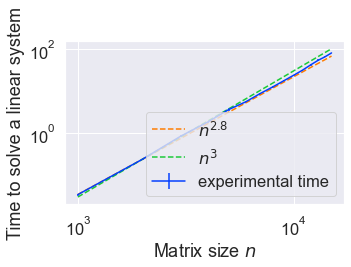

In [13]:
fig = plt.figure(figsize=(5,3))
item = 1
plt.xlabel('Matrix size $n$')
plt.ylabel('Time to solve a linear system')
plt.errorbar(N, inv, err, label='experimental time')
plt.plot(N, inv[item]*(N/N[item])**2.8, '--', label=r'$n^{2.8}$')
plt.plot(N, inv[item]*(N/N[item])**3, '--', label=r'$n^{3}$')
plt.loglog()
plt.legend()
plt.savefig('../figures/execution_time_solve.pdf', bbox_inches='tight')

In [14]:
for i in range(len(N)):
    print('{:4d} & ${:5.2f}\pm{:5.3f}$ \\\\'.format(int(N[i]), inv[i], err[i]))

1000 & $ 0.03\pm0.002$ \\
2000 & $ 0.24\pm0.008$ \\
3000 & $ 0.85\pm0.033$ \\
4000 & $ 1.83\pm0.050$ \\
5000 & $ 3.62\pm0.286$ \\
6000 & $ 5.54\pm0.283$ \\
7000 & $ 8.73\pm0.465$ \\
8000 & $12.51\pm0.539$ \\
9000 & $17.52\pm0.597$ \\
10000 & $23.71\pm0.588$ \\
11000 & $31.37\pm0.871$ \\
12000 & $41.91\pm1.526$ \\
13000 & $53.97\pm2.490$ \\
14000 & $65.46\pm2.448$ \\
15000 & $80.84\pm1.798$ \\


# Is the complexity of solving more in $O(2^{2.8})$ or $O(n^3)$ ? 

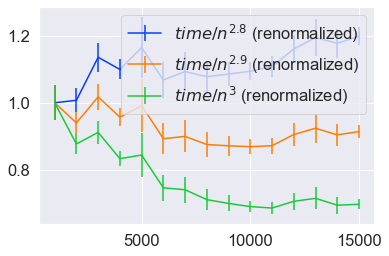

In [15]:

for exponent in [2.8, 2.9, 3]:
    normalization = inv[0]*(N/N[0])**exponent
    plt.errorbar(N, inv/normalization, err/normalization,
             label='$time / n^{'+str(exponent)+'}$ (renormalized)')
plt.legend()